<a href="https://colab.research.google.com/github/Korey01/Korey01/blob/main/COMPLETE%20SALARIES_DATABASE_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect('test.db')
import sqlalchemy

In [2]:
#CREATING Departments TABLES
conn.execute('''
  CREATE TABLE Departments(
      Code INTEGAR PRIMARY KEY NOT NULL,
      DepartmentName NVARCHAR NOT NULL,
      Budget REAL NOT NULL
  );'''
)
conn.commit()
print('Departments Table created')

Departments Table created


In [3]:

#CREATING Employees TABLES
conn.execute('''
  CREATE TABLE Employees(
    SSN INTEGAR PRIMARY KEY NOT NULL,
    FirstName TEXT NOT NULL,
    LastName NVARCHAR NOT NULL,
    DepartmentCode INTEGAR NOT NULL,
    DepartmentName NVARCHAR NOT NULL,
    Salary INTEGAR NOT NULL,
    CONSTRAINT fk_Departments_Code FOREIGN KEY(DepartmentCode)
  REFERENCES Departments(Code)

  ); '''
)
conn.commit()
print('Employees Table Created')

Employees Table Created


In [4]:
#Adding properties of Department table
conn.execute("INSERT INTO Departments(Code, DepartmentName, Budget) VALUES(14, 'IT', 65000);")
conn.execute("INSERT INTO Departments(Code, DepartmentName, Budget) VALUES(01, 'Finance', 55000);")
conn.execute("INSERT INTO Departments(Code, DepartmentName, Budget) VALUES(08, 'Human Capital', 45000);")
conn.execute("INSERT INTO Departments(Code, DepartmentName, Budget) VALUES(18, 'Sales', 50000);")

In [5]:
#Adding properties of Employees table
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0003', 'Faith', 'Pembe', 14, 'IT', 1500);")
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0010', 'Joy', 'Sasha', 01, 'Finance', 1300);")
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0007', 'Plain', 'Smart', 14, 'IT', 1700);")
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0004', 'Hush', 'Baby', 18, 'Sales', 1200);")
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0011', 'Given', 'Vibes', 18, 'Sales', 1400);")
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0006', 'Lovely', 'Daise', 08, 'Human Capital', 1500);")
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0015', 'James', 'Bund', 14, 'IT', 1500);")
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0008', 'Josh', 'Tufune', 01, 'Finance', 1700);")
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0076', 'Gayme', 'Tymz', 01, 'Finance', 1900);")
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0002', 'Funny', 'Bonez', 08, 'Human Capital', 1600);")
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0005', 'Googney', 'Tunez', 18, 'Sales', 1700);")
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0543', 'Bale', 'Pembe', 18, 'Sales', 1700);")
conn.execute("INSERT INTO Employees(SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0049', 'Bale', 'Lalupon', 01, 'Finance', 1500);")
conn.commit()

In [6]:

conn = sqlite3.connect('test.db') #Creating Test database from tables
cursor = conn.execute(''' SELECT * FROM Departments''') #Call the departments Table
for row in cursor:
  print(row) #Show Table

(14, 'IT', 65000.0)
(1, 'Finance', 55000.0)
(8, 'Human Capital', 45000.0)
(18, 'Sales', 50000.0)


In [7]:
cursor = conn.execute(''' SELECT * FROM Employees''')#Call the departments Table
for row in cursor:
  print(row) #Show Table

(3, 'Faith', 'Pembe', 14, 'IT', 1500)
(10, 'Joy', 'Sasha', 1, 'Finance', 1300)
(7, 'Plain', 'Smart', 14, 'IT', 1700)
(4, 'Hush', 'Baby', 18, 'Sales', 1200)
(11, 'Given', 'Vibes', 18, 'Sales', 1400)
(6, 'Lovely', 'Daise', 8, 'Human Capital', 1500)
(15, 'James', 'Bund', 14, 'IT', 1500)
(8, 'Josh', 'Tufune', 1, 'Finance', 1700)
(76, 'Gayme', 'Tymz', 1, 'Finance', 1900)
(2, 'Funny', 'Bonez', 8, 'Human Capital', 1600)
(5, 'Googney', 'Tunez', 18, 'Sales', 1700)
(543, 'Bale', 'Pembe', 18, 'Sales', 1700)
(49, 'Bale', 'Lalupon', 1, 'Finance', 1500)


In [8]:
#PRINT FIRST AND LAST NAME AS FULL NAME

cursor = conn.execute('''
    SELECT FirstName || ' ' || LastName AS FullName
    FROM Employees;
''') #NOTE THAT WE CANNOT USE THE CONCAT() FUNCTION LIKE THIS IN SQLITE. WHAT WE USE IS THE OPERATOR || LIKE AS USED ABOVE

for row in cursor:
    print(row[0])


Faith Pembe
Joy Sasha
Plain Smart
Hush Baby
Given Vibes
Lovely Daise
James Bund
Josh Tufune
Gayme Tymz
Funny Bonez
Googney Tunez
Bale Pembe
Bale Lalupon


##NOTE THAT WE CANNOT USE THE CONCAT() FUNCTION LIKE THIS IN SQLITE. WHAT WE USE IS THE OPERATOR || LIKE AS USED ABOVE

##PROBLEM STATEMENTS


**Select all the data of employees that work in department 1 and department 14)**

In [9]:
#USING THE CUSOR VARIABLE WITH PASSED CONN OBJECT FROM SQLITE TO PASS AND EXECUTE OUR QUERY)
cursor = conn.execute('''
  SELECT *FROM Employees
  WHERE DepartmentCode IN (1, 14);
  ''')
for row in cursor:# WE PRINT ITERATING THROUGH EVERY QUERIED ROW)
  print(row) #PRINTING DESIRED OUTPUT)

(3, 'Faith', 'Pembe', 14, 'IT', 1500)
(10, 'Joy', 'Sasha', 1, 'Finance', 1300)
(7, 'Plain', 'Smart', 14, 'IT', 1700)
(15, 'James', 'Bund', 14, 'IT', 1500)
(8, 'Josh', 'Tufune', 1, 'Finance', 1700)
(76, 'Gayme', 'Tymz', 1, 'Finance', 1900)
(49, 'Bale', 'Lalupon', 1, 'Finance', 1500)


**Select all employes with Salary starting from 1,400.00**

In [10]:
#USING THE CUSOR VARIABLE WITH PASSED CONN OBJECT FROM SQLITE TO PASS AND EXECUTE OUR QUERY)
cursor = conn.execute('''
  SELECT *FROM Employees
  WHERE Salary >= (1400);
  ''')
for row in cursor: # WE PRINT ITERATING THROUGH EVERY QUERIED ROW)
  print(row) #PRINTING DESIRED OUTPUT)

(3, 'Faith', 'Pembe', 14, 'IT', 1500)
(7, 'Plain', 'Smart', 14, 'IT', 1700)
(11, 'Given', 'Vibes', 18, 'Sales', 1400)
(6, 'Lovely', 'Daise', 8, 'Human Capital', 1500)
(15, 'James', 'Bund', 14, 'IT', 1500)
(8, 'Josh', 'Tufune', 1, 'Finance', 1700)
(76, 'Gayme', 'Tymz', 1, 'Finance', 1900)
(2, 'Funny', 'Bonez', 8, 'Human Capital', 1600)
(5, 'Googney', 'Tunez', 18, 'Sales', 1700)
(543, 'Bale', 'Pembe', 18, 'Sales', 1700)
(49, 'Bale', 'Lalupon', 1, 'Finance', 1500)


**Select all employes with Salary below 1,400.00**

In [11]:
#USING THE CUSOR VARIABLE WITH PASSED CONN OBJECT FROM SQLITE TO PASS AND EXECUTE OUR QUERY)
cursor = conn.execute('''
  SELECT * FROM Employees
  WHERE Salary < 1400;
  ''')
for row in cursor:# WE PRINT ITERATING THROUGH EVERY QUERIED ROW)
  print (row)#PRINTING DESIRED OUTPUT)

(10, 'Joy', 'Sasha', 1, 'Finance', 1300)
(4, 'Hush', 'Baby', 18, 'Sales', 1200)


**We are working on a Legth of Service benefit project and this involves giving gift cards to 5 staffs who have stayed above 2 years with the firm. However we know some have stayed longer than others and we want to prioritize those who have stayed longest. We also know that all staff with SSN 0020 and below have stayed atleast 2 years with the firm. Come up with a list of staff that will qualify for this benefit.**

In [12]:
#USING THE CUSOR VARIABLE WITH PASSED CONN OBJECT FROM SQLITE TO PASS AND EXECUTE OUR QUERY)
cursor = conn.execute('''
  SELECT * FROM Employees
  WHERE SSN <= '0020'
  LIMIT 5;
  ''')
for row in cursor: #WE PRINT ITERATING THROUGH EVERY QUERIED ROW)
  print (row)

(2, 'Funny', 'Bonez', 8, 'Human Capital', 1600)
(3, 'Faith', 'Pembe', 14, 'IT', 1500)
(4, 'Hush', 'Baby', 18, 'Sales', 1200)
(5, 'Googney', 'Tunez', 18, 'Sales', 1700)
(6, 'Lovely', 'Daise', 8, 'Human Capital', 1500)


**What percentage of finance department budget is currently being utilized?**

In [13]:
cursor = conn.execute('''
  SELECT ROUND (
   (SELECT SUM(Salary) FROM Employees
    WHERE DepartmentCode IS 1)
    /
    (SELECT SUM(Budget) FROM Departments
    WHERE DepartmentName IS 'Finance') * 100), 2
  AS Result;
''')
for row in cursor: #WE PRINT ITERATING THROUGH EVERY QUERIED ROW AND USING F.STRING TO TO JOIN THE VARIOIS STRINGED WORDS TO OUR ROW VARIABLE TO FORM A STATEMENT/SENTENCE)
  print (f"Finance is utilizing {row[0]} percent of their budget" )

Finance is utilizing 12.0 percent of their budget


**What is the average salary for all the departments?**

In [14]:
#here we use write the code to select our desired outcome by creating a variable "cursor" and passing the conn object through which we can write our SQL query on the SQlite package.
cursor = conn.execute('''
  SELECT AVG(Salary), DepartmentCode, DepartmentName FROM Employees

  GROUP BY DepartmentName;
  ''')
for row in cursor:
  print (row)

(1600.0, 1, 'Finance')
(1550.0, 8, 'Human Capital')
(1566.6666666666667, 14, 'IT')
(1500.0, 18, 'Sales')


**Plot a bar chat to show the distribution of salaries per department**

In [15]:
#First we create a df by using pd.read-sql to access the database and assign it to a variable df_departments
df_departments = pd.read_sql('SELECT * FROM Departments', conn)
print(df_departments)

   Code DepartmentName   Budget
0    14             IT  65000.0
1     1        Finance  55000.0
2     8  Human Capital  45000.0
3    18          Sales  50000.0


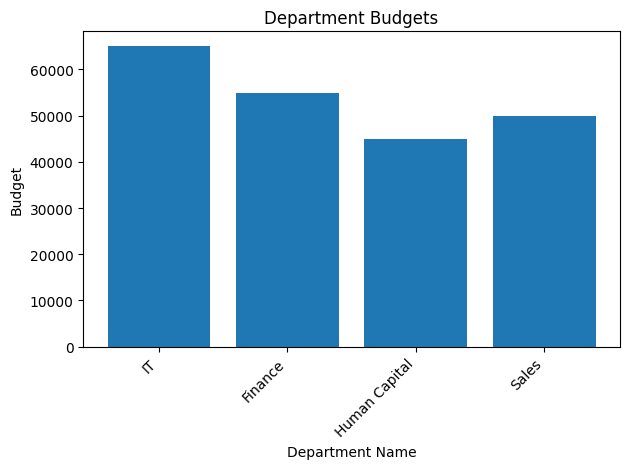

In [16]:
#Then we write the code to plot the bar chart
plt.bar(df_departments['DepartmentName'], df_departments['Budget'])
plt.xlabel('Department Name')
plt.ylabel('Budget')
plt.title('Department Budgets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

**Plot a Pie chart to show the proportion of staf per department.**

In [17]:
#This code helps to create a data frame from sql by using the pd.read_sql to write and pass the SQL querry for selecting the desired output)

df_employees = pd.read_sql('SELECT * FROM Employees', conn)
df_employees





,SSN,FirstName,LastName,DepartmentCode,DepartmentName,Salary
0,3,Faith,Pembe,14,IT,1500
1,10,Joy,Sasha,1,Finance,1300
2,7,Plain,Smart,14,IT,1700
3,4,Hush,Baby,18,Sales,1200
4,11,Given,Vibes,18,Sales,1400
5,6,Lovely,Daise,8,Human Capital,1500
6,15,James,Bund,14,IT,1500
7,8,Josh,Tufune,1,Finance,1700
8,76,Gayme,Tymz,1,Finance,1900
9,2,Funny,Bonez,8,Human Capital,1600


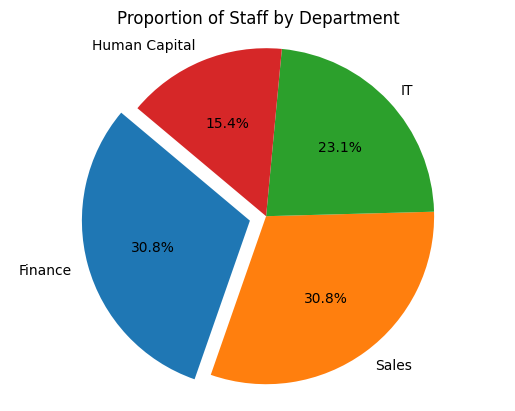

In [18]:
# Count the number of employees in each department
department_counts = df_employees['DepartmentName'].value_counts()

labels = department_counts.index
sizes = department_counts.values
explode = (0.1, 0, 0, 0)  # Explode the first slice for better visibility, adjust as needed

plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title for the pie chart
plt.title('Proportion of Staff by Department')

# Show the pie chart
plt.show()

**Plot a scatter chart to show thesalary distribution.**

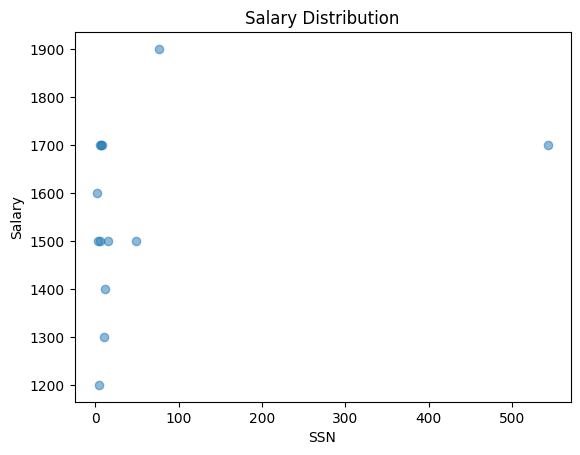

In [19]:
# Scatter plot
plt.scatter(df_employees['SSN'], df_employees['Salary'], alpha=0.5)

# Labels and title
plt.xlabel('SSN')
plt.ylabel('Salary')
plt.title('Salary Distribution')

# Show the scatter plot
plt.show()

## **James Bund a Data administrator made a bluder because he didn't like a member of staff (Bale Lalupon) and he excluded their  details from the Salaries database as because of this. He was later found out and exited from the organization. What did he do to achieve this?**

In [20]:
#This code deletes an entry from the Employees table.
conn = sqlite3.connect('test.db')
delete_bale_query = "DELETE FROM Employees WHERE SSN = 49;"
conn.execute(delete_bale_query)
conn.commit()



In [21]:
#Here we see the result of the deletion made
cursor = conn.execute('''
  Select * FROM Employees;
  ''')

for row in cursor:
  print (row)



(3, 'Faith', 'Pembe', 14, 'IT', 1500)
(10, 'Joy', 'Sasha', 1, 'Finance', 1300)
(7, 'Plain', 'Smart', 14, 'IT', 1700)
(4, 'Hush', 'Baby', 18, 'Sales', 1200)
(11, 'Given', 'Vibes', 18, 'Sales', 1400)
(6, 'Lovely', 'Daise', 8, 'Human Capital', 1500)
(15, 'James', 'Bund', 14, 'IT', 1500)
(8, 'Josh', 'Tufune', 1, 'Finance', 1700)
(76, 'Gayme', 'Tymz', 1, 'Finance', 1900)
(2, 'Funny', 'Bonez', 8, 'Human Capital', 1600)
(5, 'Googney', 'Tunez', 18, 'Sales', 1700)
(543, 'Bale', 'Pembe', 18, 'Sales', 1700)


***Two weeks later, a new staff was recruited to fill James space. Her name is Julie Shanks. She was going to be paid 2000.00 due to her years of experience. One of the first things she needed to do was? ***

1. Delete James profile from the database.
2. Re-add Bale Lalupon to the database.
3. Add herself to the database.

***What would she have done? ***

In [22]:
# Julie delets James Bund from the database here
delete_James = "DELETE FROM Employees where SSN = 15;"
conn.execute(delete_James)
conn.commit()


# Julie re-adds Bale Lalupon to the database
re_add_Lalupon = "INSERT INTO Employees (SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0053', 'Bale', 'Lalupon', 01, 'Finance', 1500);"
conn.execute(re_add_Lalupon)
conn.commit()

#Julie re-adds her self to the database
add_Julie_Shanks = "INSERT INTO Employees (SSN, FirstName, LastName, DepartmentCode, DepartmentName, Salary) VALUES('0765', 'Julie', 'Shanks', 18, 'IT', 2000);"
conn.execute(add_Julie_Shanks)
conn.commit()




In [23]:
#Calling up the employess table to see our result

Updated_DB_df = pd.read_sql ("Select * FROM Employees", conn)
Updated_DB_df

,SSN,FirstName,LastName,DepartmentCode,DepartmentName,Salary
0,3,Faith,Pembe,14,IT,1500
1,10,Joy,Sasha,1,Finance,1300
2,7,Plain,Smart,14,IT,1700
3,4,Hush,Baby,18,Sales,1200
4,11,Given,Vibes,18,Sales,1400
5,6,Lovely,Daise,8,Human Capital,1500
6,8,Josh,Tufune,1,Finance,1700
7,76,Gayme,Tymz,1,Finance,1900
8,2,Funny,Bonez,8,Human Capital,1600
9,5,Googney,Tunez,18,Sales,1700
